# **Success of Bank telemarketing**

## Importing Datasets

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_sample = pd.read_csv("sample_submission.csv")

## Data Preprocessing

In [5]:
df_train.shape # Shape of df_train dataset

(39211, 16)

In [6]:
df_test.shape # Shape of test dataset

(10000, 15)

In [7]:
df_sample.shape # Shape of sample dataset

(10000, 2)

In [8]:
df_train.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no


In [9]:
df_sample.head()

,id,target
0,0,no
1,1,no
2,2,no
3,3,yes
4,4,yes


## Checking the types of data

In [10]:
df_test.dtypes

last contact date    object
age                   int64
job                  object
marital              object
education            object
default              object
balance               int64
housing              object
loan                 object
contact              object
duration              int64
campaign              int64
pdays                 int64
previous              int64
poutcome             object
dtype: object

In [11]:
df_train.dtypes

last contact date    object
age                   int64
job                  object
marital              object
education            object
default              object
balance               int64
housing              object
loan                 object
contact              object
duration              int64
campaign              int64
pdays                 int64
previous              int64
poutcome             object
target               object
dtype: object

## Exploratory Data Analysis (EDA)

### Check for missing values

In [12]:
df_test.isnull().sum()

last contact date       0
age                     0
job                    59
marital                 0
education             390
default                 0
balance                 0
housing                 0
loan                    0
contact              2684
duration                0
campaign                0
pdays                   0
previous                0
poutcome             7508
dtype: int64

In [13]:
df_train.isnull().sum()

last contact date        0
age                      0
job                    229
marital                  0
education             1467
default                  0
balance                  0
housing                  0
loan                     0
contact              10336
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome             29451
target                   0
dtype: int64

### Display the summary statistics of numerical features

In [14]:
df_train.describe()

,age,balance,duration,campaign,pdays,previous
count,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000
mean,42.120247,5441.781719,439.062789,5.108770,72.256051,11.826171
std,12.709352,16365.292065,769.096291,9.890153,160.942593,44.140259
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,98.000000,109.000000,1.000000,-1.000000,0.000000
50%,40.000000,549.000000,197.000000,2.000000,-1.000000,0.000000
75%,50.000000,2030.000000,380.000000,4.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [15]:
# Display information about the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.

In [16]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

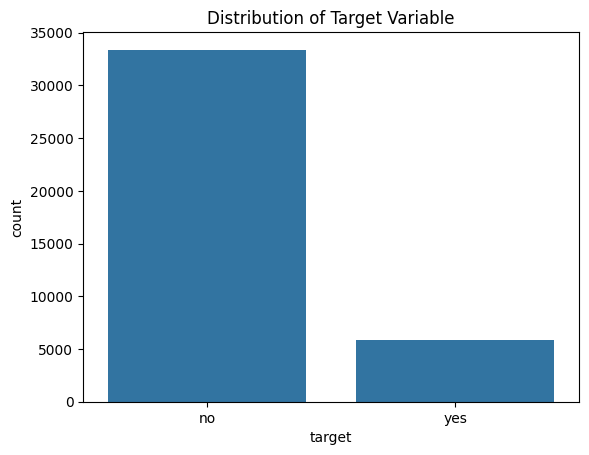

In [17]:
# Check the distribution of the target variable
sns.countplot(x='target', data=df_train)
plt.title('Distribution of Target Variable')
plt.show()

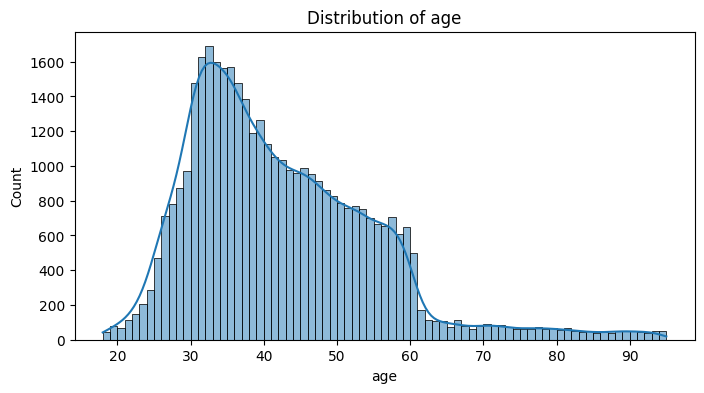

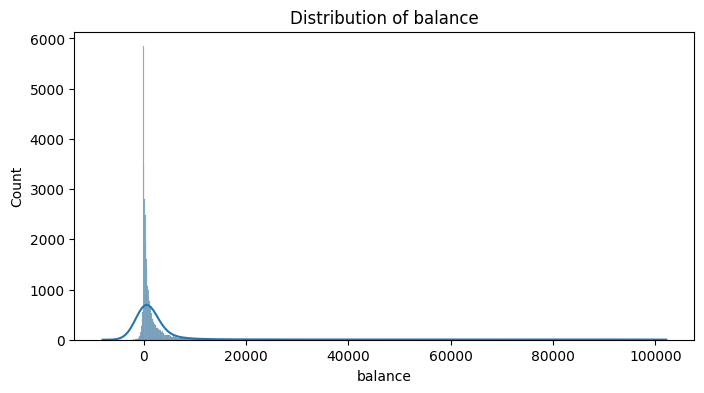

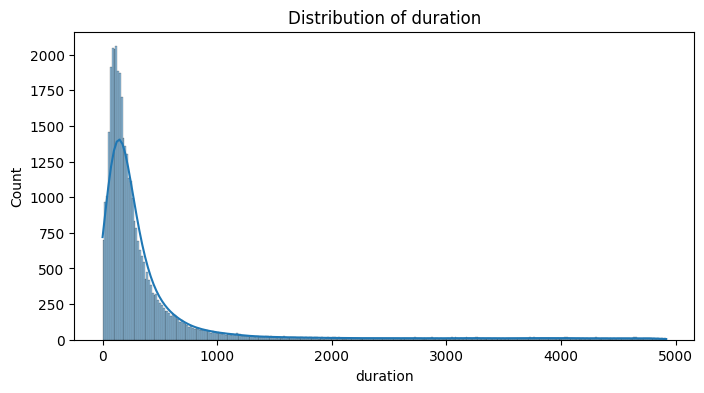

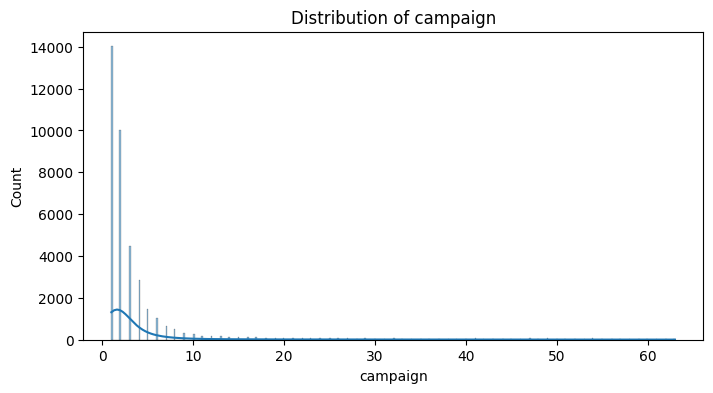

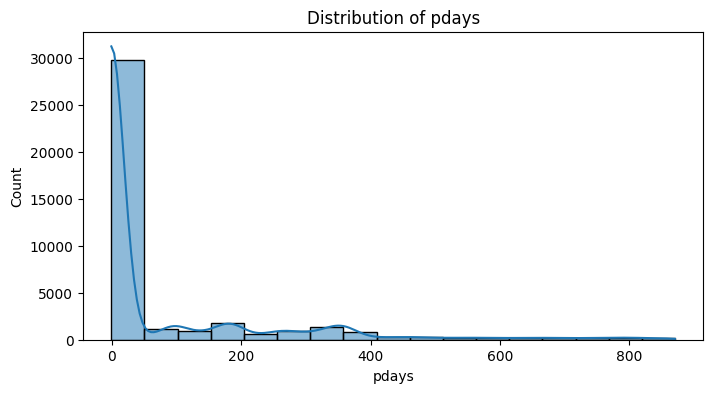

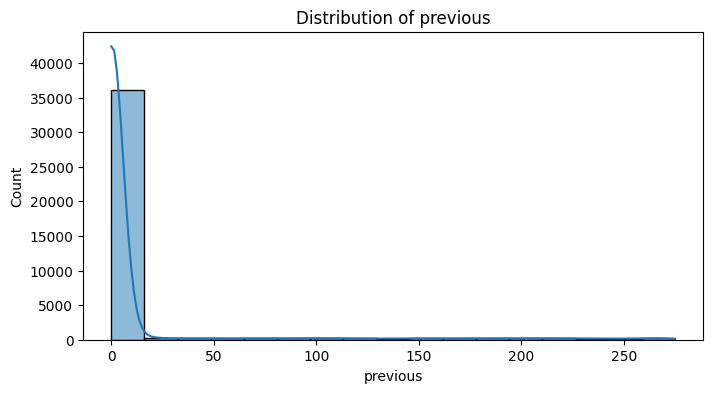

In [18]:
# Visualize the distribution of numerical features
numerical_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_train[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

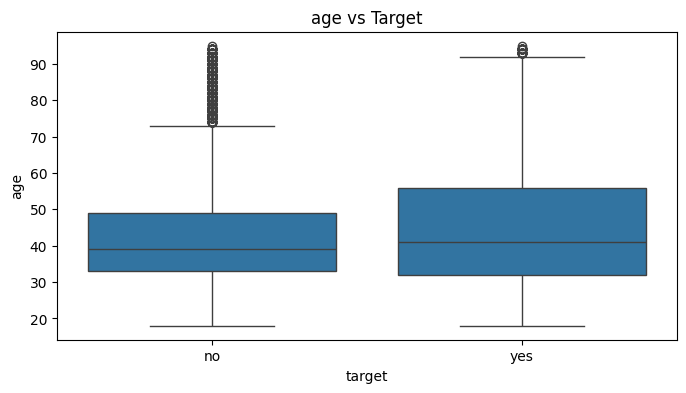

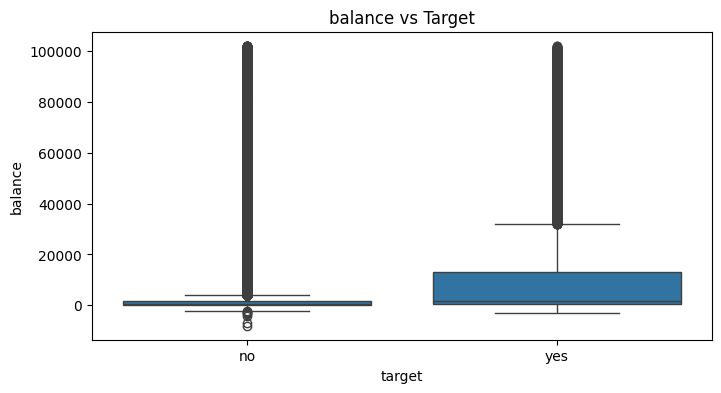

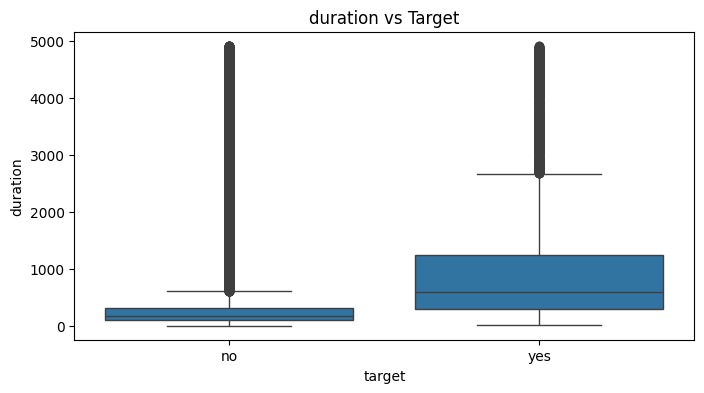

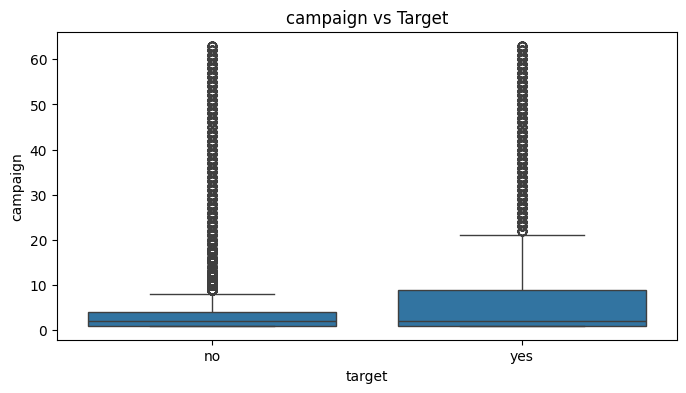

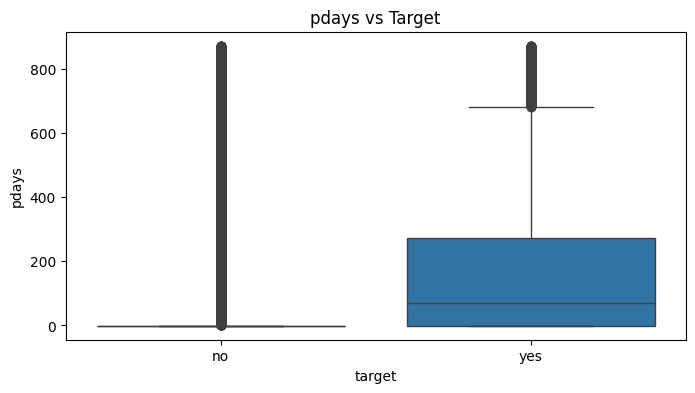

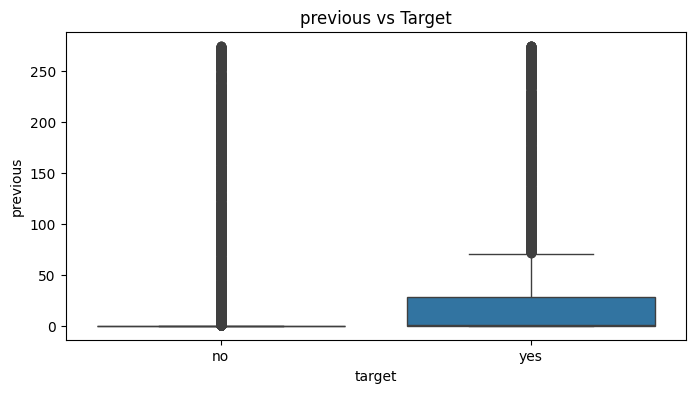

In [19]:
# Visualize relationships between numerical features and target variable
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='target', y=feature, data=df_train)
    plt.title(f'{feature} vs Target')
    plt.show()

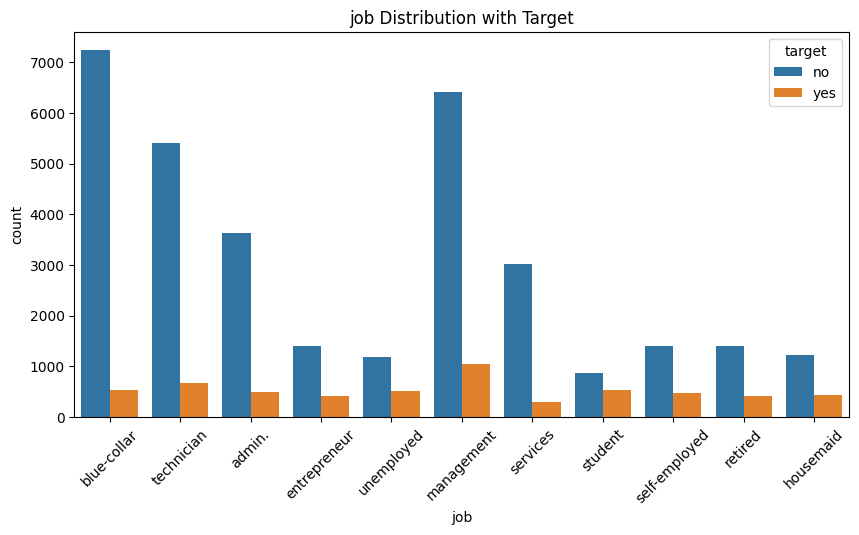

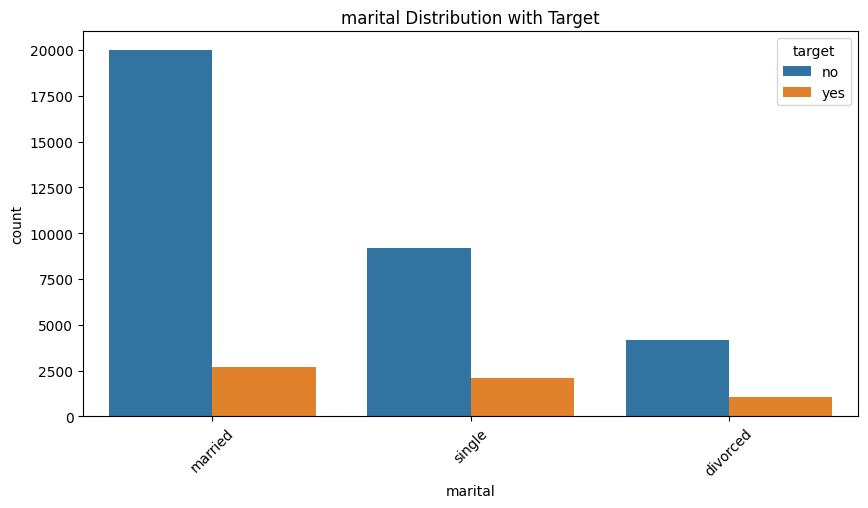

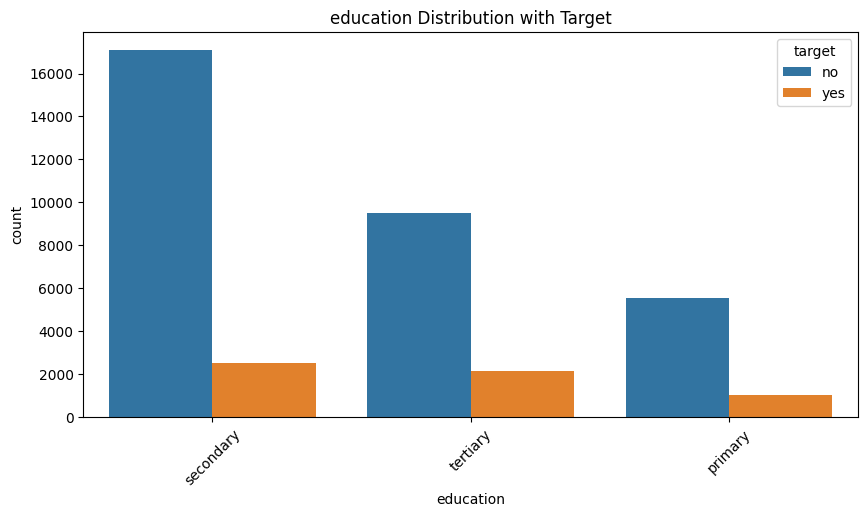

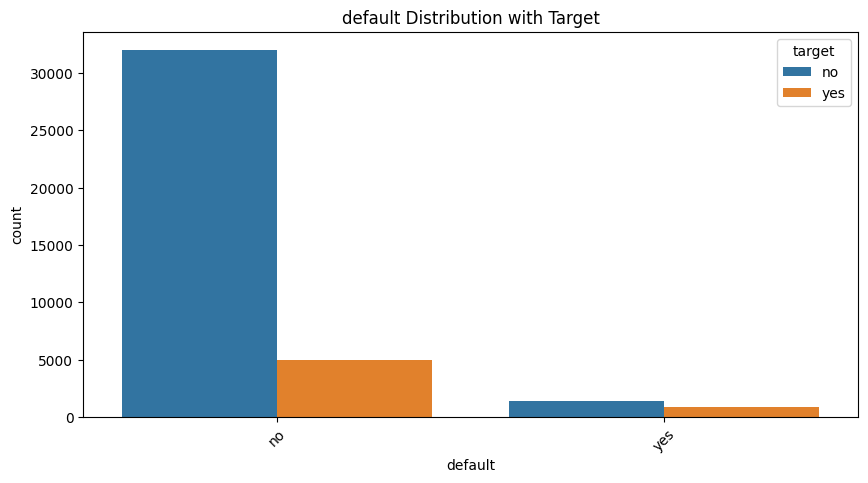

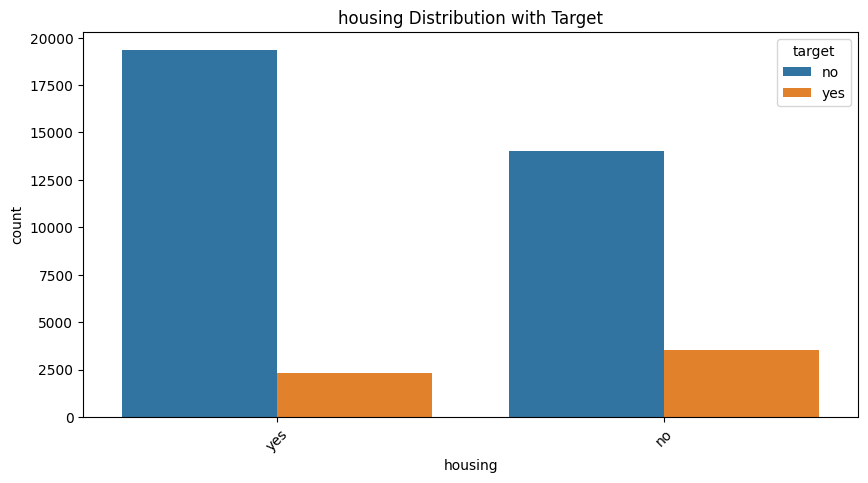

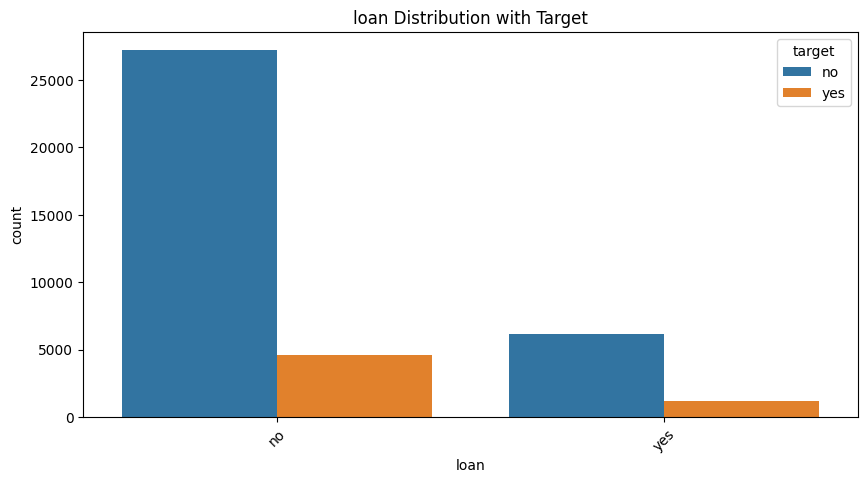

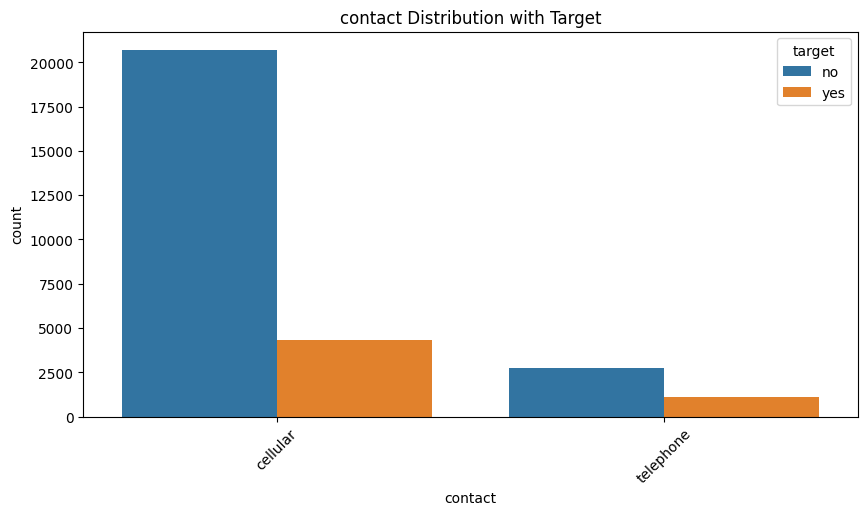

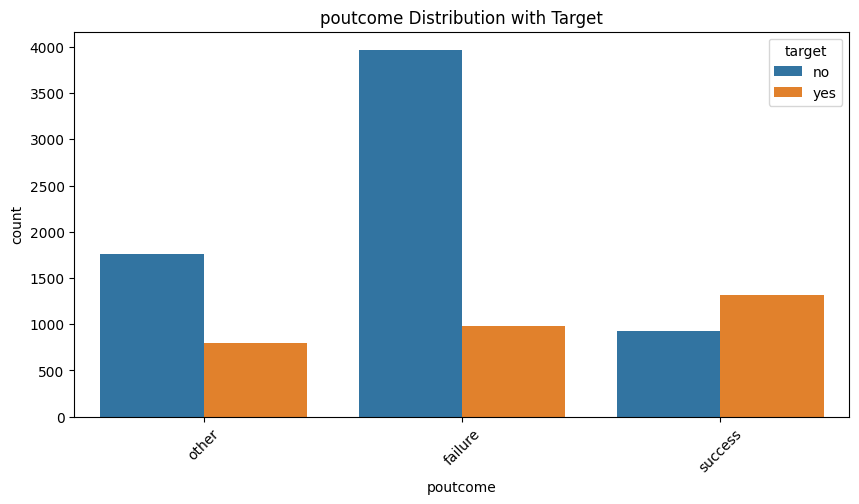

In [20]:
# Visualize the distribution of categorical features
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, data=df_train, hue='target')
    plt.title(f'{feature} Distribution with Target')
    plt.xticks(rotation=45)
    plt.show()

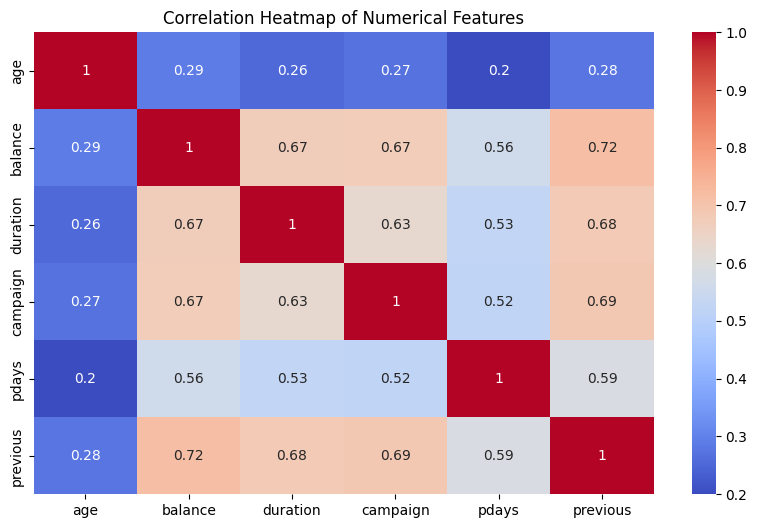

In [21]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(df_train[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [22]:
# # Pairplot to visualize relationships between numerical features
# sns.pairplot(df_train, vars=numerical_features, hue='target')
# plt.show()

## Data Preprocessing

### Handling Missing Values

In [23]:
# Handling missing values in train dataset
df_train['job'] = df_train['job'].fillna(df_train['job'].mode()[0])
df_train['education'] = df_train['education'].fillna(df_train['education'].mode()[0])
df_train['contact'] = df_train['contact'].fillna(df_train['contact'].mode()[0])
df_train['poutcome'] = df_train['poutcome'].fillna('unknown')

In [24]:
# Handling missing values in test dataset
df_test['job'] = df_test['job'].fillna(df_test['job'].mode()[0])
df_test['education'] = df_test['education'].fillna(df_test['education'].mode()[0])
df_test['contact'] = df_test['contact'].fillna(df_test['contact'].mode()[0])
df_test['poutcome'] = df_test['poutcome'].fillna('unknown')

### Encoding Categorical Features

In [25]:
from sklearn.preprocessing import LabelEncoder
# Encoding categorical variables
cat_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
for col in cat_features:
    encoder = LabelEncoder()
    df_train[col] = encoder.fit_transform(df_train[col].astype(str))
    df_test[col] = encoder.transform(df_test[col].astype(str))

In [26]:
df_train.head()

,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,1,1,1,0,647,1,0,0,357,2,331,1,1,no
1,2009-10-11,52,9,1,1,0,553,1,0,1,160,1,-1,0,3,no
2,2010-11-20,44,1,1,1,0,1397,0,0,0,326,1,-1,0,3,no
3,2009-09-01,33,0,1,1,0,394,1,0,1,104,3,-1,0,3,no
4,2008-01-29,31,2,2,2,0,137,0,0,0,445,2,-1,0,3,no


In [27]:
df_train.isnull().sum()

last contact date    0
age                  0
job                  0
marital              0
education            0
default              0
balance              0
housing              0
loan                 0
contact              0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
target               0
dtype: int64

### Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
df_train[num_features] = scaler.fit_transform(df_train[num_features])
df_test[num_features] = scaler.fit_transform(df_test[num_features])

### Convert Date Column to Numerical Format

In [29]:
# Convert 'last contact date' to datetime and create new features
df_train['last_contact_date'] = pd.to_datetime(df_train['last contact date'])
df_train['contact_month'] = df_train['last_contact_date'].dt.month
df_train['contact_dayofweek'] = df_train['last_contact_date'].dt.dayofweek

# Drop the original 'last contact date' feature as it's not needed
df_train.drop(columns=['last_contact_date'], inplace=True)
df_train.drop(columns=['last contact date'], inplace=True)

# Convert 'last contact date' to datetime and create new features
df_test['last_contact_date'] = pd.to_datetime(df_test['last contact date'])
df_test['contact_month'] = df_test['last_contact_date'].dt.month
df_test['contact_dayofweek'] = df_test['last_contact_date'].dt.dayofweek

# Drop the original 'last contact date' feature as it's not needed
df_test.drop(columns=['last_contact_date'], inplace=True)
df_test.drop(columns=['last contact date'], inplace=True)

### Splitting the Data

In [30]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df_train.drop('target', axis=1)
y = df_train['target']

smote = SMOTE(random_state=42, sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X, y)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [31]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,contact_month,contact_dayofweek
20413,1.957619,4,1,2,0,-0.307776,0,0,0,-0.123605,-0.314334,0.141319,-0.222615,2,11,1
19227,0.856054,9,1,1,0,-0.274840,1,0,0,0.468006,-0.112110,-0.455175,-0.267926,3,7,3
55112,0.668196,0,1,1,0,-0.145195,1,0,0,-0.343838,-0.329816,0.586714,-0.229553,2,11,3
13320,-0.874977,4,0,2,0,-0.309731,0,0,0,-0.399257,0.090114,-0.455175,-0.267926,3,2,6
54218,-1.108115,4,2,2,0,-0.279245,0,0,0,-0.325092,-0.314334,-0.433793,-0.266249,2,2,1


In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53414 entries, 20413 to 15795
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                53414 non-null  float64
 1   job                53414 non-null  int64  
 2   marital            53414 non-null  int64  
 3   education          53414 non-null  int64  
 4   default            53414 non-null  int64  
 5   balance            53414 non-null  float64
 6   housing            53414 non-null  int64  
 7   loan               53414 non-null  int64  
 8   contact            53414 non-null  int64  
 9   duration           53414 non-null  float64
 10  campaign           53414 non-null  float64
 11  pdays              53414 non-null  float64
 12  previous           53414 non-null  float64
 13  poutcome           53414 non-null  int64  
 14  contact_month      53414 non-null  int32  
 15  contact_dayofweek  53414 non-null  int32  
dtypes: float64(6), int32(2)

## Models

### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize and train the logistic regression model
lr_model = LogisticRegression(max_iter=10, solver='liblinear', C=0.01, penalty='l1', class_weight='balanced')
lr_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = lr_model.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# score = 0.67606

c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy: 0.7737007638160851
Confusion Matrix:
 [[5242 1306]
 [1716 5090]]
Classification Report:
               precision    recall  f1-score   support

          no       0.75      0.80      0.78      6548
         yes       0.80      0.75      0.77      6806

    accuracy                           0.77     13354
   macro avg       0.77      0.77      0.77     13354
weighted avg       0.78      0.77      0.77     13354



In [34]:
from sklearn.feature_selection import RFE

selector = RFE(estimator=LogisticRegression(random_state=42), n_features_to_select=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Evaluate the model on the test set
y_pred = selector.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7704058709001048
Confusion Matrix:
 [[5160 1388]
 [1678 5128]]
Classification Report:
               precision    recall  f1-score   support

          no       0.75      0.79      0.77      6548
         yes       0.79      0.75      0.77      6806

    accuracy                           0.77     13354
   macro avg       0.77      0.77      0.77     13354
weighted avg       0.77      0.77      0.77     13354



In [35]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline


# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('feature_selection', SelectKBest(score_func=f_classif, k=3)),  # Feature selection
    ('polynomial_features', PolynomialFeatures(degree=3, interaction_only=False, include_bias=True))  # Polynomial features
])

# Fit the pipeline on the training data
X_train_transformed = pipeline.fit_transform(X_train, y_train)

# Transform the test data
X_test_transformed = pipeline.transform(X_test)

# Transform the original test data
original_test_transformed = pipeline.transform(df_test)

# Print transformed shapes for verification
print("Transformed Training Data Shape:", X_train_transformed.shape)
print("Transformed Test Data Shape:", X_test_transformed.shape)
print("Transformed Original Test Data Shape:", original_test_transformed.shape)


# Initialize and train the logistic regression model
best_model = LogisticRegression(max_iter=50, solver='liblinear', C=10, class_weight='balanced', penalty='l2', random_state=42)
best_model.fit(X_train_transformed, y_train)

# Predict and evaluate
y_pred = best_model.predict(X_test_transformed)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Transformed Training Data Shape: (53414, 20)
Transformed Test Data Shape: (13354, 20)
Transformed Original Test Data Shape: (10000, 20)
Accuracy: 0.8076231840646997
Confusion Matrix:
 [[5265 1283]
 [1286 5520]]
Classification Report:
               precision    recall  f1-score   support

          no       0.80      0.80      0.80      6548
         yes       0.81      0.81      0.81      6806

    accuracy                           0.81     13354
   macro avg       0.81      0.81      0.81     13354
weighted avg       0.81      0.81      0.81     13354



### Best Parameters Selection

In [36]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'C': [ 0.01, 0.5, 0.1, 1, 10],
#     'solver': ['sag', 'lbfgs', 'liblinear'],
#     'max_iter': [1, 5, 10, 20],
#     'penalty': ['l1', 'l2']
# }

# grid_search = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# # Best model
# print("Best Parameters:", grid_search.best_params_)
# lr_model = grid_search.best_estimator_

# # Evaluate the model on the test set
# y_pred = lr_model.predict(X_test)

# # Print evaluation metrics
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))

### Random Forest Model

In [37]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the retrained model on the test set
y_pred_rf = rf_model.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.8499326044630823
Confusion Matrix:
 [[5301 1247]
 [ 757 6049]]
Classification Report:
               precision    recall  f1-score   support

          no       0.88      0.81      0.84      6548
         yes       0.83      0.89      0.86      6806

    accuracy                           0.85     13354
   macro avg       0.85      0.85      0.85     13354
weighted avg       0.85      0.85      0.85     13354



### Support Vector Machine (SVM) with Tweaked Hyperparameters

In [38]:
# from sklearn.svm import SVC

# # Initialize and train the SVM with a low C value to allow more misclassification
# svm_model = SVC(kernel='linear', C=0.01)  # Lower C increases bias and reduces accuracy
# svm_model.fit(X_train, y_train)

# # Evaluate the SVM model
# y_pred_svm = svm_model.predict(X_test)# Print evaluation metrics
# print("Accuracy:", accuracy_score(y_test, y_pred_svm))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
# print("Classification Report:\n", classification_report(y_test, y_pred_svm))


### Reducing Features Further

In [39]:
# # Use a smaller subset of features to intentionally reduce model performance
# X_train_small = X_train[['age', 'campaign', 'duration']]
# X_test_small = X_test[['age', 'campaign', 'duration']]

# # Train Logistic Regression again on the reduced feature set
# model_small = LogisticRegression(max_iter=100)
# model_small.fit(X_train_small, y_train)

# # Evaluate the model
# y_pred_small = model_small.predict(X_test_small)

# # Print evaluation metrics
# print("Accuracy:", accuracy_score(y_test, y_pred_small))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_small))
# print("Classification Report:\n", classification_report(y_test, y_pred_small))
# not run...

###  Logistic Regression with Class Weight Imbalance

In [40]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Encode the target variable (y_train and y_test)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # 'no' -> 0, 'yes' -> 1
y_test_encoded = label_encoder.transform(y_test)

# Train Logistic Regression with class weights
cv_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
cv_model.fit(X_train, y_train_encoded)

# Evaluate the model
y_pred = cv_model.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test_encoded, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred))
print("Classification Report:\n", classification_report(y_test_encoded, y_pred))

# score = 0.66846



Accuracy: 0.7711547101991912
Confusion Matrix:
 [[5141 1407]
 [1649 5157]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.79      0.77      6548
           1       0.79      0.76      0.77      6806

    accuracy                           0.77     13354
   macro avg       0.77      0.77      0.77     13354
weighted avg       0.77      0.77      0.77     13354



### Early Stopping with Gradient Boosting

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting with limited iterations to underfit
gb_model = GradientBoostingClassifier(n_estimators=1, max_depth=1, random_state=42)
gb_model.fit(X_train, y_train)

# Evaluate the model
y_pred_gb = gb_model.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))

#score = 0.60481 

Accuracy: 0.7507113973341321
Confusion Matrix:
 [[4441 2107]
 [1222 5584]]
Classification Report:
               precision    recall  f1-score   support

          no       0.78      0.68      0.73      6548
         yes       0.73      0.82      0.77      6806

    accuracy                           0.75     13354
   macro avg       0.76      0.75      0.75     13354
weighted avg       0.75      0.75      0.75     13354



###  Decision Tree with Controlled Depth

In [42]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree with low depth
dt_model = DecisionTreeClassifier(max_depth=1, random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate the model
y_pred_dt = dt_model.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# score = 0.60481

Accuracy: 0.7507113973341321
Confusion Matrix:
 [[4441 2107]
 [1222 5584]]
Classification Report:
               precision    recall  f1-score   support

          no       0.78      0.68      0.73      6548
         yes       0.73      0.82      0.77      6806

    accuracy                           0.75     13354
   macro avg       0.76      0.75      0.75     13354
weighted avg       0.75      0.75      0.75     13354



###  Naive Bayes Classifier Model

In [43]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_nb = nb_model.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))


Accuracy: 0.6010184214467575
Confusion Matrix:
 [[6032  516]
 [4812 1994]]
Classification Report:
               precision    recall  f1-score   support

          no       0.56      0.92      0.69      6548
         yes       0.79      0.29      0.43      6806

    accuracy                           0.60     13354
   macro avg       0.68      0.61      0.56     13354
weighted avg       0.68      0.60      0.56     13354



### K-Nearest Neighbors (KNN) Model

In [44]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN with more neighbors
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

# Evaluate the KNN model
y_pred_knn = knn_model.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

Accuracy: 0.9019020518196795
Confusion Matrix:
 [[5524 1024]
 [ 286 6520]]
Classification Report:
               precision    recall  f1-score   support

          no       0.95      0.84      0.89      6548
         yes       0.86      0.96      0.91      6806

    accuracy                           0.90     13354
   macro avg       0.91      0.90      0.90     13354
weighted avg       0.91      0.90      0.90     13354



### Neural Network

In [45]:
from sklearn.neural_network import MLPClassifier

# Initialize NN with more neighbors
nn_model = MLPClassifier(solver='lbfgs', alpha=1e-4,
                    hidden_layer_sizes=(3,2), random_state=1)
nn_model.fit(X_train, y_train)

# Evaluate the NN model
y_pred_nn = nn_model.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))
print("Classification Report:\n", classification_report(y_test, y_pred_nn))

# score = 0.46260

Accuracy: 0.4903399730417852
Confusion Matrix:
 [[6548    0]
 [6806    0]]


c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

          no       0.49      1.00      0.66      6548
         yes       0.00      0.00      0.00      6806

    accuracy                           0.49     13354
   macro avg       0.25      0.50      0.33     13354
weighted avg       0.24      0.49      0.32     13354



c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### XGBoost Model

In [46]:
import xgboost as xgb

# XGBoost parameters
xgb_params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'learning_rate': 0.05,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42,
}

# Mapping 'yes'/'no' to 1 and 0 internally only for model compatibility
label_map = {'yes': 1, 'no': 0}
y_train_mapped = y_train.map(label_map)
y_test_mapped = y_test.map(label_map)

# Convert data to DMatrix format for XGBoost
train_data = xgb.DMatrix(X_train, label=y_train_mapped)
test_data = xgb.DMatrix(X_test, label=y_test_mapped)

# Train the model
xgb_model = xgb.train(xgb_params, train_data, num_boost_round=500, 
                  evals=[(train_data, 'train'), (test_data, 'validation')], 
                  early_stopping_rounds=50, verbose_eval=100)

# Test the model
test_pred = xgb_model.predict(test_data)
test_pred_labels = ['yes' if x > 0.5 else 'no' for x in test_pred]

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, test_pred_labels))
print("Confusion Matrix:\n", confusion_matrix(y_test, test_pred_labels))
print("Classification Report:\n", classification_report(y_test, test_pred_labels))

# Convert the test DataFrame to DMatrix
data_test = xgb.DMatrix(df_test)

[0]	train-logloss:0.66733	validation-logloss:0.66786
[100]	train-logloss:0.25748	validation-logloss:0.27081
[200]	train-logloss:0.21414	validation-logloss:0.23606
[300]	train-logloss:0.18955	validation-logloss:0.21916
[400]	train-logloss:0.17152	validation-logloss:0.20859
[499]	train-logloss:0.15798	validation-logloss:0.20195
Accuracy: 0.9128351055863412
Confusion Matrix:
 [[5848  700]
 [ 464 6342]]
Classification Report:
               precision    recall  f1-score   support

          no       0.93      0.89      0.91      6548
         yes       0.90      0.93      0.92      6806

    accuracy                           0.91     13354
   macro avg       0.91      0.91      0.91     13354
weighted avg       0.91      0.91      0.91     13354



## Submission File

In [47]:
df_sample.head()

,id,target
0,0,no
1,1,no
2,2,no
3,3,yes
4,4,yes


In [48]:
prediction = lr_model.predict(df_test)
submission=pd.DataFrame(columns=['id', 'target'])
submission['id'] = [i for i in range(0,len(prediction))]
#submission["target"] = ['yes' if x > 0.5 else 'no' for x in prediction]
submission['target']= prediction
submission.to_csv('submission.csv', index=False, encoding='utf-8')







In [49]:
submission.head()

,id,target
0,0,no
1,1,no
2,2,no
3,3,yes
4,4,yes


### Read Submission file

In [50]:
submit = pd.read_csv("submission.csv")
submit

,id,target
0,0,no
1,1,no
2,2,no
3,3,yes
4,4,yes
...,...,...
9995,9995,no
9996,9996,yes
9997,9997,yes
9998,9998,yes
